# Компьютерный практикум
## Домашняя работа, модуль 4

```
Бобер Станислав Алексеевич
Ст. преп. Департамента Прикладной Математики
e-mail: sbober@hse.ru, stas.bober@gmail.com
```

-----
## Выполненную работу необходимо загрузить по ссылке:
[ЗАГРУЗИТЬ РЕШЕНИЕ](https://www.dropbox.com/request/nrgxX2MIl0YqtOaxXwXH)



Обязательные требования:
----------------------------------------
- Каждый студент решает задания в своём ноутбуке. Решения, сданные в других ноутбуках **не принимаются**.
- Решение должно размещаться сразу после ячейки с заданием в одной или нескольких ячейках.
- Каждое решение должно быть независимо от решений других заданий, т.е. все необходимые импорты должны присутствовать в решении каждого задания.
- В каждом решении результат должен быть **выведен на экран**.
- Чем более общее решение (в разумных пределах), тем выше оценка.

-----
#### Задание 0

В архиве `evolution.zip` находятся 360 файлов с именами `evolution_NNN.txt`, где `NNN = 000...359` - номер орбиты. В первом столбце каждого файла записаны расстояния (в км) перицентров орбиты (ближайших к планете точек) на каждый из 225 дней.

Необходимо:
1. Сформировать `DataFrame`, в котором 225 столбцов и 360 строк. Каждая строка соответствует орбите, а столбец - дню. В ячейках записаны расстояния перицентров.
2. Найти номера орбит, расстояние перицентров которых всегда больше 6350 км.
3. Изобразить цветовую карту (`contourf`): по оси абсцисс - номер орбиты, по оси ординат - номер дня, цветом отображены расстояния перицентров. Рядом с цветовой картой изобразить colorbar.
4. Изобразить поверх цветовой карты изолинии (`contour`), соответствующие уровням 6050, 6250, 6350 км.

In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data_from_zip(filename):
    """
    Load task data from .zip file.
    :param filename: .zip file name to get data from
    :return: object with loaded data, pandas.DataFrame 
    """
    
    result = pd.DataFrame()

    with ZipFile(filename, 'r') as zip_file:
        namelist = zip_file.namelist()
        for name in sorted(namelist):
            with zip_file.open(name) as file:
                next(file)
                first_col = []
                for line in file:
                    first_col.append(float(line.split()[0]))
                result = result.append(pd.Series(first_col), ignore_index=True)

    return result

In [3]:
# Load data from .zip file (item №1 of task №0).

zip_filename = 'evolution.zip' # Define .zip filename to get data from.
evolution = load_data_from_zip(zip_filename) # Get DataFrame object with loaded data.
print('Сформированный датафрейм: \n')
display(evolution)

Сформированный датафрейм: 



,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,6450.644530,6449.351129,6447.931157,6446.396441,6444.759226,6443.032137,6441.228128,6439.360433,6437.442517,6435.488028,...,6930.636647,6931.076880,6931.307711,6931.334868,6931.164805,6930.804682,6930.262342,6929.546286,6928.665645,6927.630146
1,6450.548195,6449.153993,6447.628947,6445.985088,6444.234880,6442.391177,6440.467169,6438.476340,6436.432411,6434.349292,...,6921.510946,6921.901404,6922.076918,6922.043262,6921.806953,6921.375233,6920.756047,6919.958010,6918.990386,6917.863049
2,6450.448843,6448.950883,6447.317872,6445.562051,6443.696109,6441.733129,6439.686548,6437.570099,6435.397765,6433.183721,...,6912.156048,6912.493375,6912.610215,6912.512394,6912.206503,6911.699873,6911.000552,6910.117281,6909.059462,6907.837124
3,6450.346609,6448.742075,6446.998353,6445.127901,6443.143632,6441.058870,6438.887296,6436.642899,6434.339925,6431.992821,...,6902.580453,6902.861588,6902.916693,6902.751657,6902.373145,6901.788585,6901.006137,6900.034672,6898.883734,6897.563514
4,6450.241625,6448.527835,6446.670794,6444.683179,6442.578135,6440.369227,6438.070385,6435.695859,6433.260159,6430.778005,...,6892.796387,6893.018427,6893.008902,6892.773764,6892.319763,6891.654425,6890.786030,6889.723581,6888.476775,6887.055966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,6451.077101,6450.239470,6449.297586,6448.262329,6447.144935,6445.956962,6444.710238,6443.416824,6442.088966,6440.739048,...,6972.362792,6973.001848,6973.459047,6973.739988,6973.850902,6973.798635,6973.590631,6973.234905,6972.740015,6972.115040
356,6450.997507,6450.075536,6449.044730,6447.916147,6446.701214,6445.411691,6444.059621,6442.657291,6441.217182,6439.751920,...,6964.572745,6965.179082,6965.598087,6965.835369,6965.897191,6965.790447,6965.522647,6965.101890,6964.536836,6963.836679
357,6450.914343,6449.904513,6448.781322,6447.556012,6446.240207,6444.845875,6443.385279,6441.870938,6440.315570,6438.732052,...,6956.495817,6957.065775,6957.442905,6957.632836,6957.641868,6957.476952,6957.145673,6956.656218,6956.017357,6955.238408
358,6450.827727,6449.726638,6448.507725,6447.182416,6445.762539,6444.260274,6442.688111,6441.058801,6439.385308,6437.680763,...,6948.137563,6948.667774,6948.999643,6949.138825,6949.091664,6948.865174,6948.467019,6947.905484,6947.189452,6946.328370


In [4]:
# Find orbit numbers (item №2 of task №0).

threshold = 6350 # Define threshold to be used.
idx_list = [] # List of orbit numbers.

for index, row in evolution.iterrows():
    if np.all(row > threshold):
        idx_list.append(index)

print('Номера орбит, расстояние перицентров которых всегда больше 6350 км:\n', idx_list)

Номера орбит, расстояние перицентров которых всегда больше 6350 км:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,

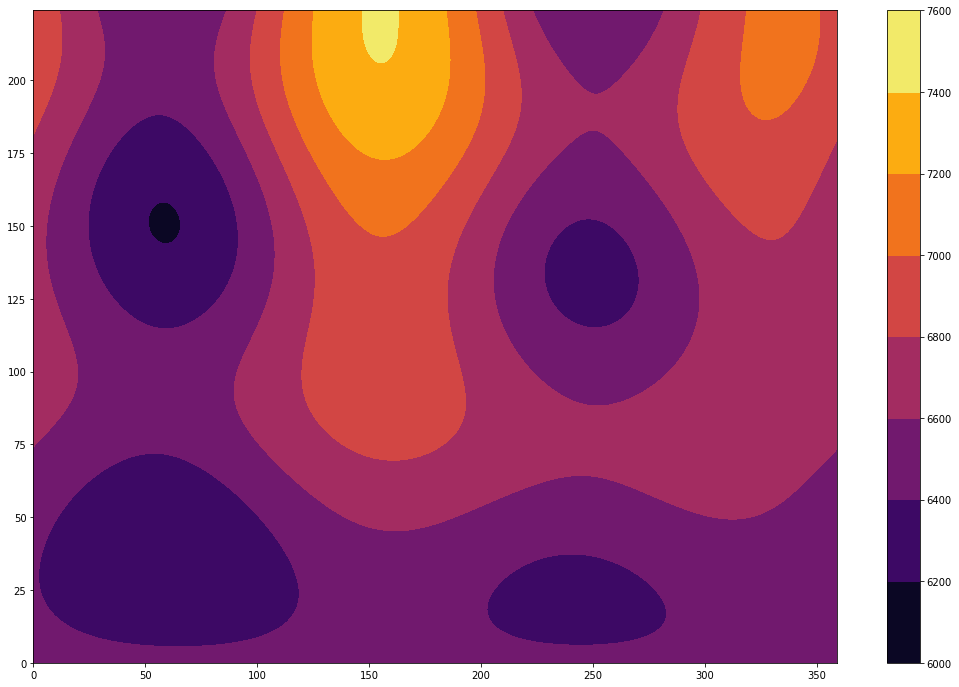

In [5]:
# Plot filled contours (item №3 of task №0).

figure_size = (18, 12) # Define figure size.

plt.figure(figsize=figure_size)
plt.contourf(evolution.transpose(), cmap='inferno')
plt.colorbar();

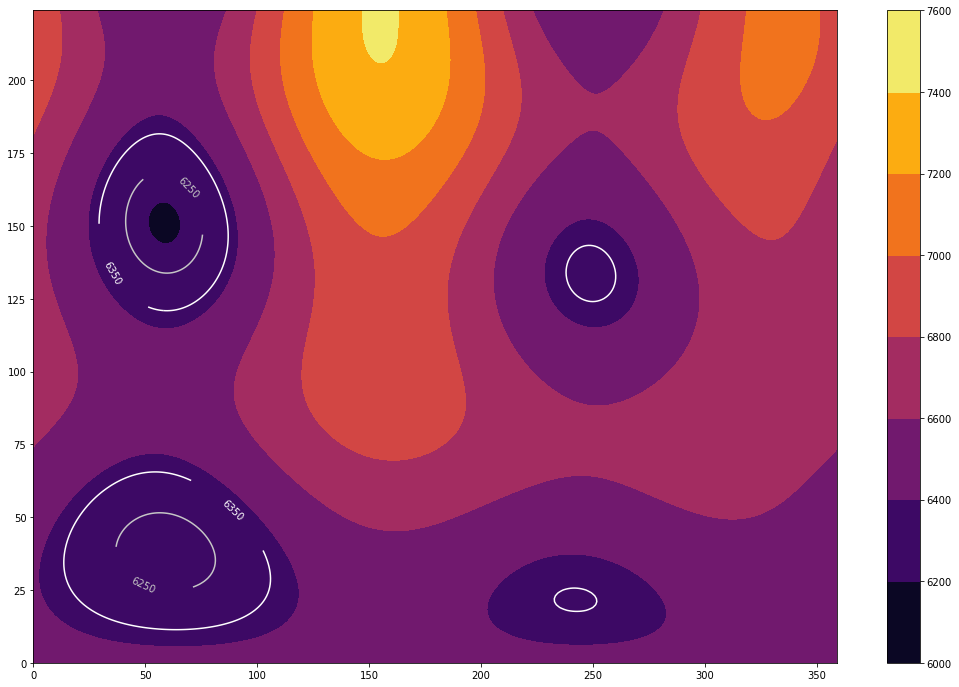

In [6]:
# Plot filled contours and contour lines at defined levels (item №4 of task №0).

levels = [6050, 6250, 6350] # Define levels.
Z = evolution.transpose() # Get matrix to be plotted.

fig, ax = plt.subplots()

filled_contour_set = ax.contourf(Z, cmap='inferno')
plt.colorbar(mappable=filled_contour_set)
contour_set = ax.contour(Z, levels=levels, cmap='Greys_r')
ax.clabel(contour_set, fmt='%d')

fig.set_figwidth(figure_size[0])
fig.set_figheight(figure_size[1])

-----
#### Задание 1

В файле `PR_HLY_L1_Sun-Earth (default).npy` находится массив `numpy` с плоскими кривыми - горизонтальными орбитами Ляпунова, лежащими в плоскости XY. Орбиты заданы в полярной системе координат `r-theta` с центром в точке $L_1$, лежащей на оси X. Каждой орбите соответствует строка массива, где записаны длины радиус-векторов каждой точки орбиты от точки $L_1$. Все радиус-вектора соответствуют углам `theta = np.linspace(0., np.pi, 720)`.
Функция `w` определена ниже.

Необходимо: 
1. На каждой орбите найти точку, соответствующую минимуму функции $\omega$
2. Изобразить на графике все орбиты и найденные точки

$ w(x,y) = \frac{x^2 + y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} $

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

$ L_1 = 0.9900289479871328 $

Для поиска минимума следует для каждой орбиты:
0. сформировать массивы `r` (строка из файла) и `theta = np.linspace(0., np.pi, 720)`
1. построить сплайн `sr(theta)` при помощи `scipy.interpolate.InterpolatedUnivariateSpline` и данных из `п.0.`
2. написать функцию `rth2xy(r, theta)` для вычисления координат `x-y` по координатам `r-theta` (не забывая, что `r` задан относительно $L_1$)
3. написать функцию вычисления `w(x, y)`
4. написать функцию вычисления `w1(theta) = w(rth2xy(sr(theta), theta))`, используя `пп.1.,2.,3.`
5. минимизировать функцию `w1(theta)` для `theta` на отрезке `[1, 2.2]` при помощи `scipy.optimize.fminbound`
6. по полученному `theta*` вычислить `x*,y* = rth2xy(sr(theta*), theta*)`

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fminbound

In [8]:
# Define plot style here.
plt.style.use('ggplot')

In [9]:
# Define constants here.
L1 = 0.9900289479871328
MU = 3.001348389698916e-6

In [10]:
def rth2xy(r_, theta_):
    """
    Convert polar coordinates to rectangular coordinates.
    This function uses global variable L1.
    :param r_: radius, float
    :param theta_: polar angle, float
    :return: pair of rectangular coordinates (x, y), tuple
    """
    x_ = L1 + r_ * np.cos(theta_)
    y_ = r_ * np.sin(theta_)
    return x_, y_


def w(x_, y_):
    """
    Calculate function w defined above.
    This function uses global variable MU.
    :param x_: abscissa, float
    :param y_: ordinate, float
    :return: value of function w at point (x, y), float
    """
    r_1 = np.sqrt((x_ + MU)**2 + y_**2)
    r_2 = np.sqrt((x_ - (1 - MU))**2 + y_**2)
    return (x_**2 + y_**2) / 2.0 + (1 - MU) / r_1 + MU / r_2

In [11]:
# Load task data from .npy file.

npy_filename = 'PR_HLY_L1_Sun-Earth (default).npy' # Define .npy filename to get data from
data = np.load(npy_filename) # numpy.ndarray object with loaded data

In [12]:
# Find min points (item №1 of task №1).

theta = np.linspace(0., np.pi, 720) # Define values of polar angle.
points = [] # List of points to be found.

for r in data:
    sr = InterpolatedUnivariateSpline(theta, r)

    def w1(theta_):
        """
        Define function w1 as composition of functions scipy.optimize.InterpolatedUnivariateSpline and rth2xy.
        :param theta_: polar angle
        :return: value of composition at point theta_
        """
        return w(*rth2xy(sr(theta_), theta_))

    theta_0 = fminbound(w1, 1, 2.2, xtol=1e-8)
    x_0, y_0 = rth2xy(sr(theta_0), theta_0)
    points.append((x_0, y_0))
    
print('Точки минимума:\n', points)

Точки минимума:
 [(0.9900289479134335, 1.7214020101818158e-10), (0.9900289476966656, 6.244495708197556e-10), (0.9900289473186864, 1.6365621645702896e-09), (0.990028946848114, 2.239716779067202e-09), (0.9900289478615768, 1.0089650630992859e-08), (0.9900289464340373, 1.1108220374654698e-08), (0.9900289456572994, 1.2045304846719417e-08), (0.9900289498587588, 1.727558486147489e-08), (0.9900289499671476, 2.0629798110078025e-08), (0.9900289470311568, 2.5757743231568996e-08), (0.9900289503764136, 2.700206473849681e-08), (0.9900289498894175, 3.1383613967889915e-08), (0.9900289482343436, 3.6136647123300725e-08), (0.99002894876325, 3.9402138497426334e-08), (0.9900289477832889, 4.318394637155987e-08), (0.990028947193181, 4.6692205237252534e-08), (0.9900289483630536, 5.0213166983669706e-08), (0.9900289478228804, 5.393900885036664e-08), (0.9900289471305694, 5.7587732869859856e-08), (0.9900289483915228, 6.118199559830734e-08), (0.9900289466703727, 6.49669883198092e-08), (0.9900289472413697, 6.883120

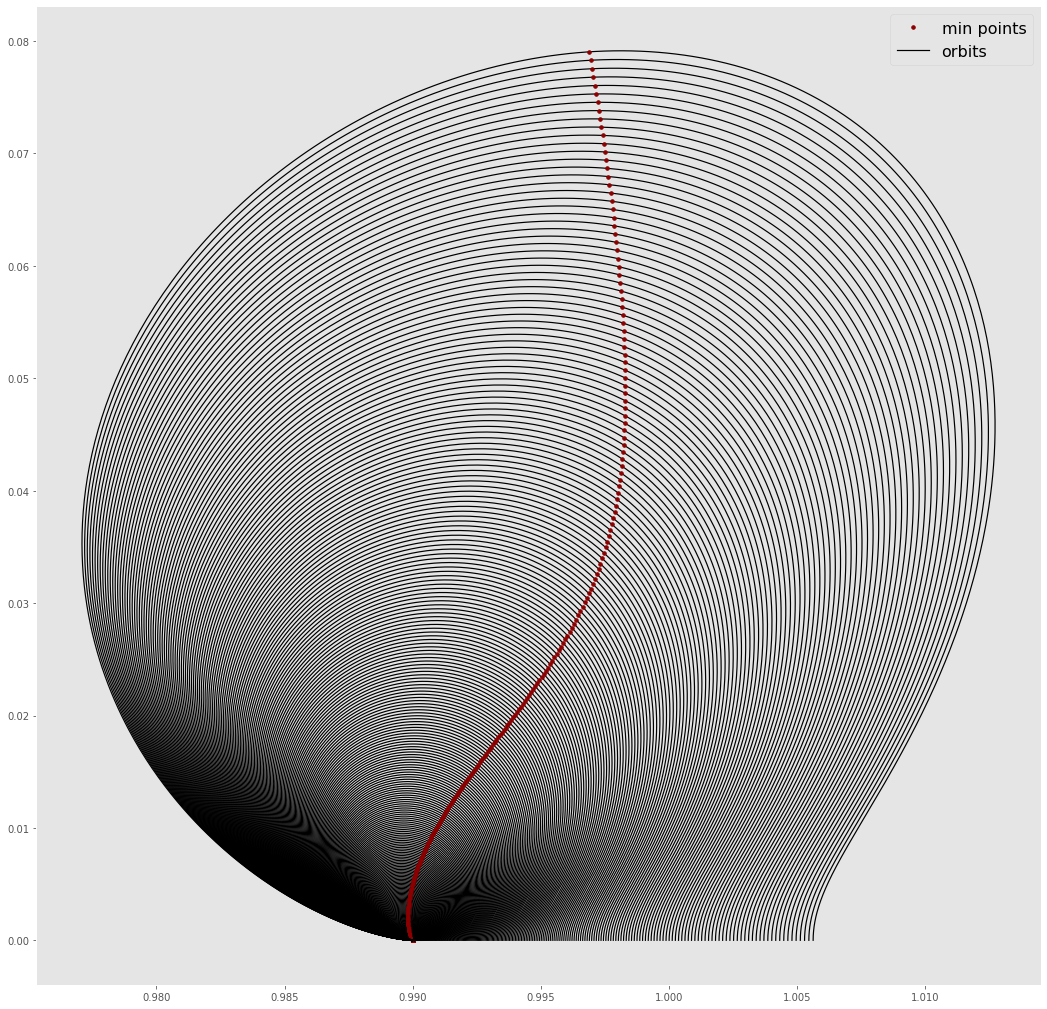

In [13]:
# Plot orbits and found above points. It works slowly.

figure_size = (18, 18) # Define figure size.

plt.figure(figsize=figure_size)
plt.grid()

for r, point in zip(data, points):
    x, y = rth2xy(r, theta)
    x_0, y_0 = point
    orbit, = plt.plot(x, y, linewidth=1.2, color='black') # Plot an orbit.
    point, = plt.plot(x_0, y_0, marker='o', markersize=3.5, color='darkred', linestyle="None") # Plot a point.

plt.legend([point, orbit], ['min points', 'orbits'], loc='upper right', fontsize=16);

-----
#### Задание 2

Рассчитать и изобразить (n - номер в [списке студентов](https://docs.google.com/spreadsheets/d/1fv1tVQFAsDdYMftGgYhY7WpjhmEOeDBJoFQR2N23KRw/edit#gid=1697491086)):
- [бассейны Ньютона](https://ru.wikipedia.org/wiki/Бассейны_Ньютона) (n % 3 = 0)
- [множество Мандельброта](https://ru.wikipedia.org/wiki/Множество_Мандельброта) (n % 3 = 1)
- [фрактал Ляпунова](https://ru.wikipedia.org/wiki/Фрактал_Ляпунова) (n % 3 = 2)

План решения задачи:
1. написать функцию для расчета в одной точке плоскости (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
2. написать функцию для расчета на прямоугольной равномерной решетке (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
3. выполнить расчет и получить матрицу значений
4. при помощи `imshow` изобразить полученную матрицу (цветовую карту cmap выбрать самостоятельно)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from numba import jit, njit

In [15]:
# Define plot style.
plt.style.use('ggplot')

In [16]:
# Define fractal to be used in task.
n = 28 
fractal = 'бассейны Ньютона' * (n % 3 == 0) + 'множество Мандельброта' * (n % 3 == 1) + 'фрактал Ляпунова' * (n % 3 == 2)
print(fractal)

множество Мандельброта


In [17]:
# Not jitted approach to get Mandelbrot set. 

def mandelbrot_at_point(x_0, y_0, r, max_iter):
    """
    Calculate whether a point belongs to the Mandelbrot set.
    :param x_0: x-coordinate (abscissa) of the point
    :param y_0: y-coordinate (ordinate) of the point
    :param r: radius to define if sequence is bounded
    :param max_iter: max number of iterations
    :return: number of iterations
    """
    c = x_0 + 1j*y_0
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if np.abs(z) > r:
            break
    return n

def mandelbrot_over_grid(x, y, r, max_iter):
    """
    Calculate matrix to display Mandelbrot set.
    :param x: array of x-coordinates of grid
    :param y: array of y-coordinates of grid
    :param r: radius to define if sequence is bounded
    :param max_iter: max number of iterations
    :return: matrix of number of iterations to calculate
    whether a point belongs to the Mandelbrot set at points of grid.
    """
    f = partial(mandelbrot_at_point, r=r, max_iter=max_iter)
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

In [18]:
# Jitted non-python functions (using njit decorator) to get Mandelbrot set.


# Item №1 of task №1.
@njit('i8(f8,f8,f8, i8)')
def mandelbrot_at_point_njitted(x_0, y_0, r, max_iter):
    """
    Calculate whether a point belongs to the Mandelbrot set. Function with @njit decorator.
    :param x_0: x-coordinate (abscissa) of the point
    :param y_0: y-coordinate (ordinate) of the point
    :param r: radius to define if sequence is bounded
    :param max_iter: max number of iterations
    :return: number of iterations
    """
    x, y = 0., 0.
    r_squared = r**2
    for n in range(max_iter):
        x, y = x*x - y*y + x_0, 2*x*y + y_0
        if x*x + y*y > r_squared:
            break
    return n


# Item №2 of task №1.
@njit('f8[:,:](f8[:],f8[:],f8, i8)')
def mandelbrot_over_grid_njitted(x, y, r, max_iter):
    """
    Calculate matrix to display Mandelbrot set. Function with @njit decorator.
    :param x: array of x-coordinates of grid
    :param y: array of y-coordinates of grid
    :param r: radius to define if sequence is bounded
    :param max_iter: max number of iterations
    :return: matrix of number of iterations to calculate
    whether a point belongs to the Mandelbrot set at points of grid
    """
    result = np.empty((y.shape[0], x.shape[0]))
    for i, x_0 in enumerate(x):
        for j, y_0 in enumerate(y):
            result[j, i] = mandelbrot_at_point_njitted(x_0, y_0, r, max_iter)
    return result

In [19]:
x = np.linspace(-2., 1., 2048)
y = np.linspace(-1., 1., 1024)
n = 100 # Max number of iterations.
r = 256. # Radius to define if sequence is bounded.

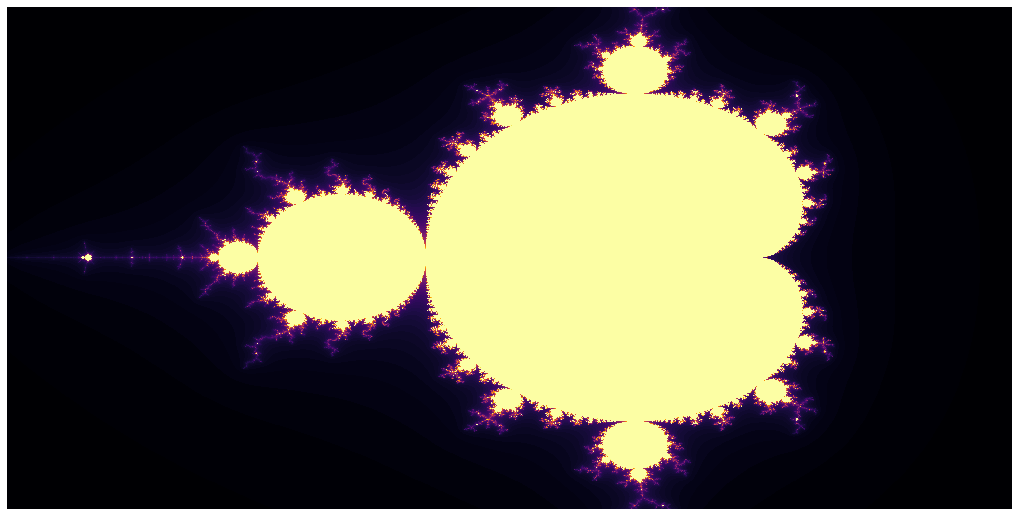

In [20]:
# Calculate matrix to display colored Mandelbrot set and image it. 

plt.figure(figsize=(18, 18))
Z = mandelbrot_over_grid_njitted(x, y, r=r, max_iter=n)
plt.imshow(Z, cmap='inferno')
plt.axis('off');

-----
#### Задание 3

В файле fin.csv находится информация о доходах и расходах физического лица.

Требуется:
1. Рассчитать среднемесячный доход на каждый год
2. Среднемесячный расход по каждой категории на каждый год
3. Рассчитать сводную таблицу суммарных расходов: строки - Категория/Год, столбцы - Месяц.
4. Для каждой пары (Категория, Год) изобразить столбчатую диаграмму: суммарные расходы на каждый месяц (использовать таблицу из п.3).
5. Рассчитать состояние счета физического лица на каждый день и изобразить график. В начальный момент времени счет был нулевым.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
import datetime

In [3]:
plt.style.use('ggplot')

In [4]:
csv_filename = 'fin.csv' # Define .csv filename to get data from.
df = pd.read_csv(csv_filename, index_col='ВРЕМЯ') # Load data using time column as index.
display(df)

,СУММА,КАТЕГОРИЯ
ВРЕМЯ,,
2017-04-28 01:58:00,-205.0,Еда
2017-04-28 22:43:00,-153.0,Еда
2017-04-28 22:43:00,-600.0,Интернет и телефон
2017-04-29 13:59:00,-265.0,Еда
2017-04-29 13:59:00,-5000.0,Путешествия
...,...,...
2019-09-14 17:56:00,-10996.0,Одежда и обувь
2019-09-14 19:11:00,-120.0,Еда
2019-09-15 12:16:00,-1300.0,Еда


In [6]:
df.index = pd.to_datetime(df.index) # Transform string representing time to datetime.

In [7]:
df.loc[(df['КАТЕГОРИЯ'] != 'Доходы') & (df['СУММА'] > 0), 'СУММА'] *= -1 # Fix a mistake with a sign of some expenses.

In [11]:
# Calculate average monthly income for each year (item №1 of task №3).

incomes = df[df['КАТЕГОРИЯ'] == 'Доходы'] # Get only incomes to make query below more readable.
avg_monthly_income = incomes.groupby([incomes.index.year, incomes.index.strftime('%b')]) \
                            .agg(**{'ДОХОД ЗА МЕСЯЦ': pd.NamedAgg(column='СУММА', aggfunc=sum)}) \
                            .rename_axis(index=['ГОД', 'МЕСЯЦ']) \
                            .groupby('ГОД') \
                            .agg(**{'СРЕДНЕМЕСЯЧНЫЙ ДОХОД': pd.NamedAgg(column='ДОХОД ЗА МЕСЯЦ', aggfunc=np.mean)}) \
                            .round()

display(incomes.groupby([incomes.index.year, incomes.index.strftime('%b')]) \
                            .agg(**{'ДОХОД ЗА МЕСЯЦ': pd.NamedAgg(column='СУММА', aggfunc=sum)}) \
                            .rename_axis(index=['ГОД', 'МЕСЯЦ']))

ДОХОД ЗА МЕСЯЦ
ГОД  МЕСЯЦ                
2017 авг          120142.0
     апр           50000.0
     дек          322861.0
     июл          113997.0
     июн          184427.0
     май           56134.0
     ноя          287854.0
     окт          159985.0
     сен           69771.0
2018 авг           90871.0
     апр          200827.0
     дек          243403.0
     июл          134187.0
     июн          283884.0
     май          253347.0
     мар          175172.0
     ноя          214724.0
     окт          211185.0
     сен          239413.0
     фев          144862.0
     янв           44624.0
2019 авг          131846.0
     апр          222466.0
     июл          249821.0
     июн          482346.0
     май          212834.0
     мар          200445.0
     сен           62756.0
     фев          159232.0
     янв           79360.0

In [9]:
# Calculate average monthly expenses for each category for each year (item №2 of task №3).

expenses = df[df['КАТЕГОРИЯ'] != 'Доходы'] # Get only expenses to make query below more readable.
avg_monthly_expences = expenses.groupby([expenses.index.year, 'КАТЕГОРИЯ', expenses.index.strftime('%b')]) \
                                .agg(**{'РАСХОД ЗА МЕСЯЦ': pd.NamedAgg(column='СУММА', aggfunc=sum)}) \
                                .rename_axis(index=['ГОД', 'КАТЕГОРИЯ', 'МЕСЯЦ']) \
                                .groupby(['КАТЕГОРИЯ', 'ГОД']) \
                                .agg(**{'СРЕДНЕМЕСЯЧНЫЙ РАСХОД': pd.NamedAgg(column='РАСХОД ЗА МЕСЯЦ', 
                                                                             aggfunc=lambda x: x.sum())}) \
                                .round()
display(avg_monthly_expences)


СРЕДНЕМЕСЯЧНЫЙ РАСХОД
КАТЕГОРИЯ             ГОД                        
Автомобиль            2017               -14380.0
                      2018                -1800.0
Дом                   2017              -310633.0
                      2018              -591836.0
                      2019              -404699.0
Еда                   2017              -177591.0
                      2018              -330397.0
                      2019              -269360.0
Здоровье              2017                -3713.0
                      2018                -2200.0
                      2019                -2144.0
Интернет и телефон    2017                -9681.0
                      2018               -10561.0
                      2019               -11070.0
Комплектующие         2017              -251434.0
                      2018               -85248.0
                      2019               -91931.0
Компьютер и программы 2017               -68627.0
                      2018              -125569.0
                      2019                -1537.0
Красота и здоровье    2017                -4835.0
                      2018               -18834.0
                      2019               -11501.0
Обучение              2017                -9801.0
                      2018               -22723.0
                      2019               -26563.0
Одежда и обувь        2017               -45332.0
                      2018               -73312.0
                      2019               -37510.0
Подарки               2017              -143418.0
                      2018              -217756.0
                      2019               -94052.0
Путешествия           2017              -261207.0
                      2018              -244939.0
                      2019              -153490.0
Развлечения           2017               -18165.0
                      2018               -18800.0
                      2019               -20200.0
Спорт                 2017               -80980.0
                      2018              -161635.0
                      2019                -6000.0
Стройматериалы        2017                -1100.0
Транспорт             2017               -20048.0
                      2018               -41630.0
                      2019               -46694.0
Украшения             2017               -10400.0
                      2018                -4800.0
                      2019                -8000.0
Хобби                 2017                -1200.0
                      2018               -52252.0
                      2019               -27611.0

In [10]:
# Calculate pivot table of total expenses (item №3 of task №3).

locale.setlocale(locale.LC_ALL, 'Russian')

expenses = df[df['КАТЕГОРИЯ'] != 'Доходы'] # Get only expenses to make query below more readable.

pivot_table = pd.pivot_table(expenses, values='СУММА', index=['КАТЕГОРИЯ', expenses.index.year], 
                             columns=expenses.index.month, aggfunc=np.sum, fill_value=0) \
                .rename_axis(index=['КАТЕГОРИЯ', 'ГОД']) \
                .rename({'ВРЕМЯ': 'МЕСЯЦ'})


pivot_table.columns = pd.Index(pivot_table.columns, name='МЕСЯЦ') # Rename columns index.  

pivot_table.rename(columns=lambda x: datetime.datetime.strptime(str(x), '%m').strftime('%b').upper(), 
                   inplace=True) # Rename columns.

locale.setlocale(locale.LC_ALL, '')

display(pivot_table)

МЕСЯЦ                         ЯНВ    ФЕВ    МАР     АПР    МАЙ     ИЮН    ИЮЛ  \
КАТЕГОРИЯ             ГОД                                                       
Автомобиль            2017      0      0      0       0      0   -4000  -8680   
                      2018      0      0  -1800       0      0       0      0   
Дом                   2017      0      0      0       0      0  -30220 -56956   
                      2018 -64745 -42938 -43050  -43611 -61444  -41220 -65282   
                      2019 -39690 -39500 -38720  -38000 -47969  -56040 -40500   
Еда                   2017      0      0      0    -623 -16970  -20347 -23759   
                      2018 -23050 -29695 -23176  -32073 -25677  -17881 -34601   
                      2019 -24934 -23443 -31037  -26086 -33386  -37283 -39093   
Здоровье              2017      0      0      0       0      0       0      0   
                      2018      0      0      0       0      0       0      0   
                      2019      0      0      0       0      0       0  -2144   
Интернет и телефон    2017      0      0      0    -600  -5000   -1081      0   
                      2018  -1000  -1000   -500   -2000  -1561       0  -1000   
                      2019  -1000  -1470  -4000   -1300  -1000       0   -800   
Комплектующие         2017      0      0      0       0      0 -128134  -5090   
                      2018 -31641  -3081      0  -21300      0       0      0   
                      2019 -18690 -17890  -1250  -17700 -10897  -20404  -5100   
Компьютер и программы 2017      0      0      0       0   -780       0   -770   
                      2018      0  -3840   -874 -106507      0  -10702  -1390   
                      2019      0      0   -179       0      0    -900      0   
Красота и здоровье    2017      0      0      0       0      0       0   -550   
                      2018  -3000  -5921      0       0   -800   -1281      0   
                      2019  -3600   -615  -1400    -448  -1115   -2573      0   
Обучение              2017      0      0      0       0      0       0      0   
                      2018  -4585  -4061      0   -2900   -800       0  -5077   
                      2019      0  -2900  -3150   -3500  -7590   -8000      0   
Одежда и обувь        2017      0      0      0       0      0       0 -10283   
                      2018  -9999  -1500      0       0  -6500  -10580  -3500   
                      2019      0  -2000   -540       0 -12374  -11600      0   
Подарки               2017      0      0      0       0 -14200   -6250 -21151   
                      2018      0  -1000 -17680  -22900 -20650   -1600 -46634   
                      2019   -690  -6900   -450   -2070 -13642   -3020  -1400   
Путешествия           2017      0      0      0 -100507 -23987       0      0   
                      2018 -10241  -5579  -6000       0 -51671  -38049      0   
                      2019      0      0      0 -125000  -3370  -11420 -13700   
Развлечения           2017      0      0      0       0  -2870   -2200  -3800   
                      2018  -5990      0  -1320    -500      0    -400      0   
                      2019  -6800      0      0       0   -200       0 -13200   
Спорт                 2017      0      0      0       0      0       0  -2790   
                      2018 -32150 -50132 -14700   -6300      0       0      0   
                      2019      0      0      0       0  -6000       0      0   
Стройматериалы        2017      0      0      0       0      0   -1100      0   
Транспорт             2017      0      0      0       0  -1700   -2166  -1664   
                      2018  -5140  -3956  -6665   -3858  -2032   -2009  -1765   
                      2019  -5516  -6825  -2961   -3018  -6047   -5394  -9435   
Украшения             2017      0      0      0       0      0       0      0   
                      2018      0      0      0       0      0       0      0   
                      2019     

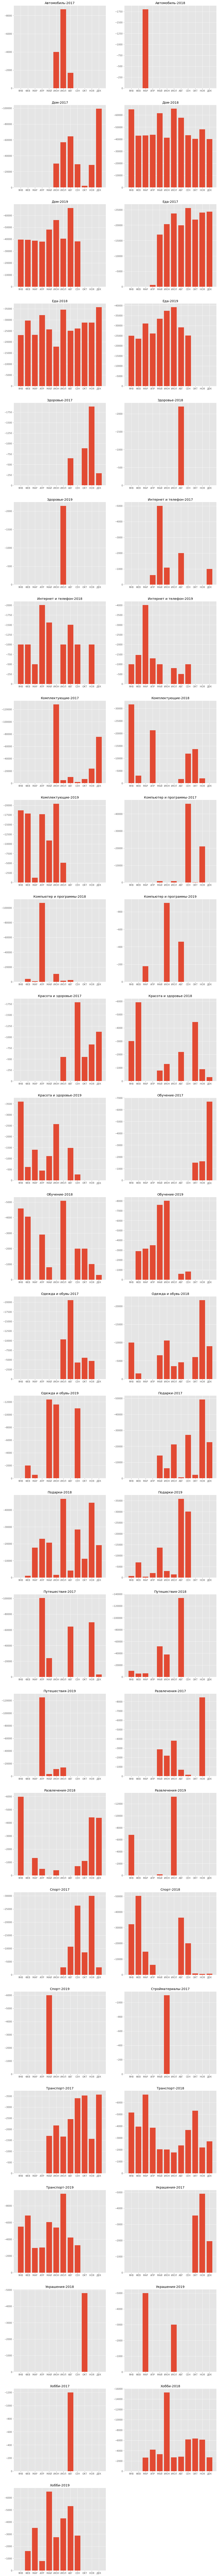

In [33]:
# Create bar plot for each pair of category and year (item №4 of task №3). It works slowly. 

n = len(pivot_table.index)
nrows = round(n / 2)
ncols = 2
figure_size = (16, nrows * 8)
i = 1

plt.figure(figsize=figure_size)

for group_name, group in pivot_table.groupby(['КАТЕГОРИЯ', 'ГОД']):
    ax = plt.subplot(nrows, ncols, i)
    ax.bar(group.columns, group.values[0])
    ax.invert_yaxis()
    ax.set_title('%s-%s'%group_name)
    i += 1

In [13]:
# Create DataFrame object with data about the daily state of account. (item №5 of task №3)
account_state = df.groupby(df.index.date) \
                    .agg(**{'СОСТОЯНИЕ СЧЕТА': pd.NamedAgg(column='СУММА', aggfunc=sum)}) \
                    .rename_axis(index=['ДЕНЬ']) \
                    .expanding(min_periods=1).sum()

# Add zero as initial value. Let it be a day before the first date in data.
account_state = pd.DataFrame(data=[0], columns=['СОСТОЯНИЕ СЧЕТА'], 
                             index=[account_state.index[0] - datetime.timedelta(1)]) \
                    .append(account_state)

# Display result. 
display(account_state)

,СОСТОЯНИЕ СЧЕТА
2017-04-27,0.0
2017-04-28,-958.0
2017-04-29,-23550.0
2017-04-30,-51730.0
2017-05-01,-56522.0
...,...
2019-09-12,814496.0
2019-09-13,770970.0
2019-09-14,757926.0
2019-09-15,755145.0


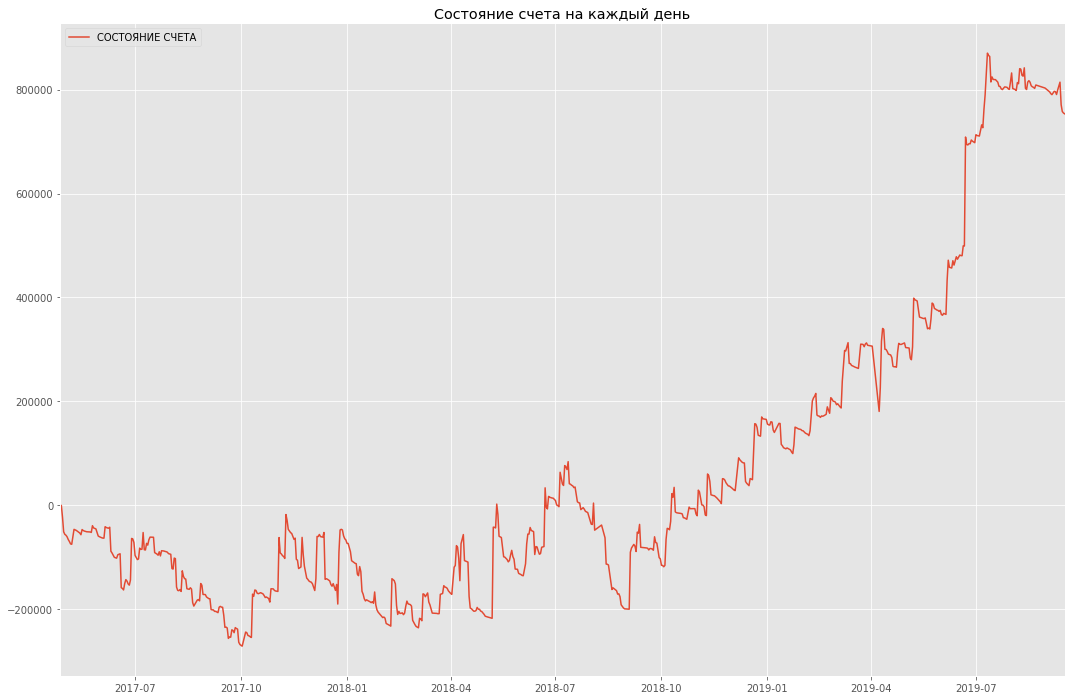

In [14]:
# Plot he daily state of account (item №5 of task №3).

ax = account_state.plot.line(figsize=(18, 12));
ax.set_title('Состояние счета на каждый день')
ax.legend(loc='upper left');